# Convolutional Neural Networks Project


---

# Working with CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

### Step 1:

Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

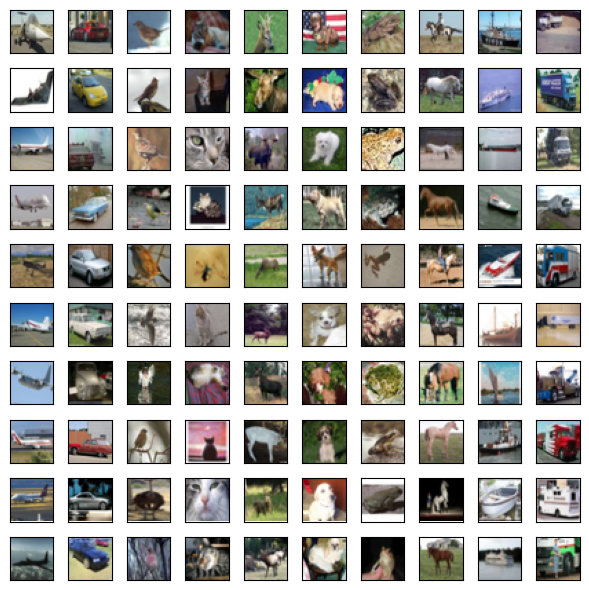

In [2]:
# Create a 10x10 subplot grid
fig, axs = plt.subplots(10, 10, figsize=(6, 6))

# Iterate over each class
for i, c in enumerate(np.unique(y_train)):
    # Select 10 random samples from this class
    idx = np.random.choice(np.where(y_train == c)[0], 10, replace=False)
    
    # Iterate over the 10 random samples
    for j, idx_j in enumerate(idx):
        # Get the corresponding image
        img = x_train[idx_j]
        
        # Display the image in the subplot
        axs[j, i].imshow(img)
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

### Step 2:

Convert the labels to one-hot encoding.

In [3]:
# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.dtype)
print(x_test.shape)

uint8
(10000, 32, 32, 3)


### Step 3:

Normalize the images

In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape labels to remove extra dimension
y_train = y_train.reshape(-1, 10)
y_test = y_test.reshape(-1, 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


### Addtional step:

Data augmentation

In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Note: These layers are active only during training, when you call `Model.fit`. They are inactive when the model is used in inference mode in `Model.evaluate`, `Model.predict`, or `Model.call`.

Let's repeatedly apply these layers to the same image and see the result.

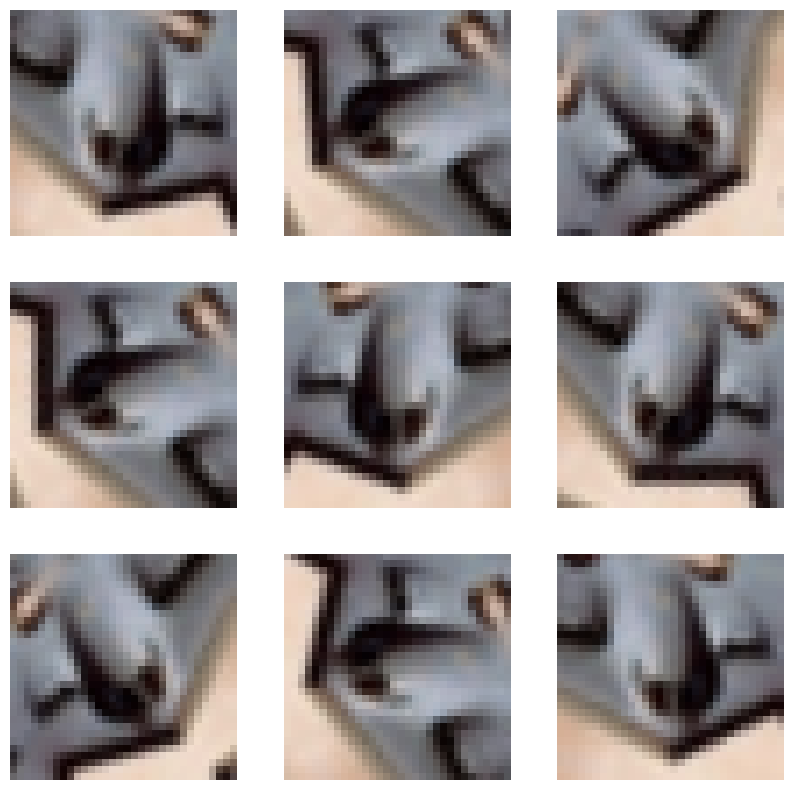

2024-09-25 15:13:30.467763: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# Create a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

# Visualize augmented images
for images, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0])
        plt.axis('off')
    plt.show()


In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Defining the model

Here we wil start wit the basic model and we´ll start adding diferent layers, hyperparameters etc to see what works best

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Input

# Define the model
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Compile and train your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=512, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.2505 - loss: 2.0966 - val_accuracy: 0.3874 - val_loss: 1.7170
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.3948 - loss: 1.7027 - val_accuracy: 0.4555 - val_loss: 1.5497
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.4233 - loss: 1.6151 - val_accuracy: 0.4654 - val_loss: 1.5139
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4471 - loss: 1.5611 - val_accuracy: 0.4740 - val_loss: 1.4826
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.4533 - loss: 1.5397 - val_accuracy: 0.4938 - val_loss: 1.4397
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4736 - loss: 1.5071 - val_accuracy: 0.4959 - val_loss: 1.4538
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.4776 - loss: 1.4829 - val_accuracy: 0.5053 - val_loss: 1.4332
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.4848 - loss: 1.4571 - val_accuracy: 0.5128 - v

*   Plot the cross entropy loss curve and the accuracy curve

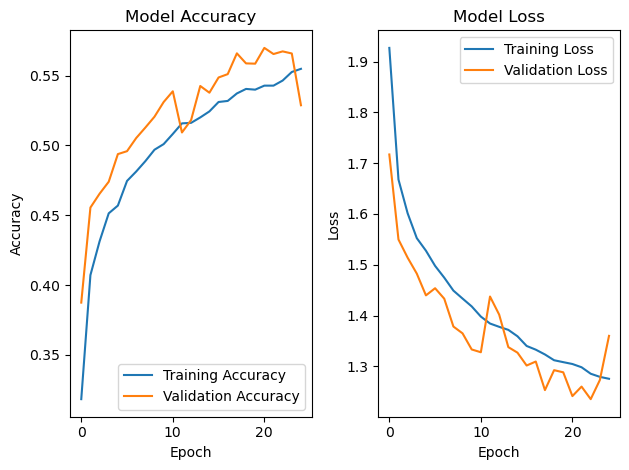

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5324 - loss: 1.3476
Test accuracy: 0.53


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


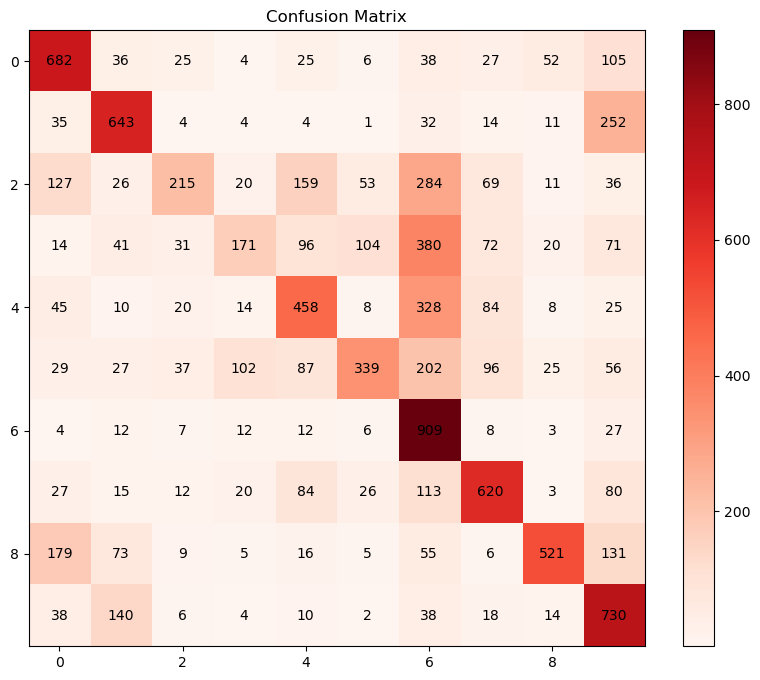

In [13]:
# Predict the output for the test split
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()